In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import math
warnings.filterwarnings('ignore')

#reading the csv file
file = pd.read_csv("/Users/admin/Documents/Manipal/MRM/CarPrices/CarPrice_Assignment.csv")
tester = pd.read_csv("/Users/admin/Documents/Manipal/MRM/CarPrices/CarPrice_Assignment.csv")
file.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
CompanyName = file['CarName'].apply(lambda x : x.split(' ')[0])
file.insert(3,"CompanyName",CompanyName)
file.drop(['CarName'],axis=1,inplace=True)
file.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
file.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [4]:
file.CompanyName = file.CompanyName.str.lower()

def replace_name(a,b):
    file.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

file.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [5]:
unique_cars = file[['CompanyName', 'price']].drop_duplicates()
print(unique_cars)

     CompanyName    price
0    alfa-romero  13495.0
1    alfa-romero  16500.0
3           audi  13950.0
4           audi  17450.0
5           audi  15250.0
..           ...      ...
200        volvo  16845.0
201        volvo  19045.0
202        volvo  21485.0
203        volvo  22470.0
204        volvo  22625.0

[199 rows x 2 columns]


In [6]:
file.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


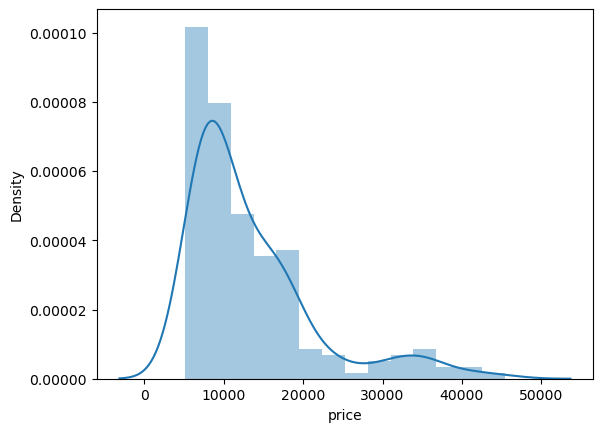

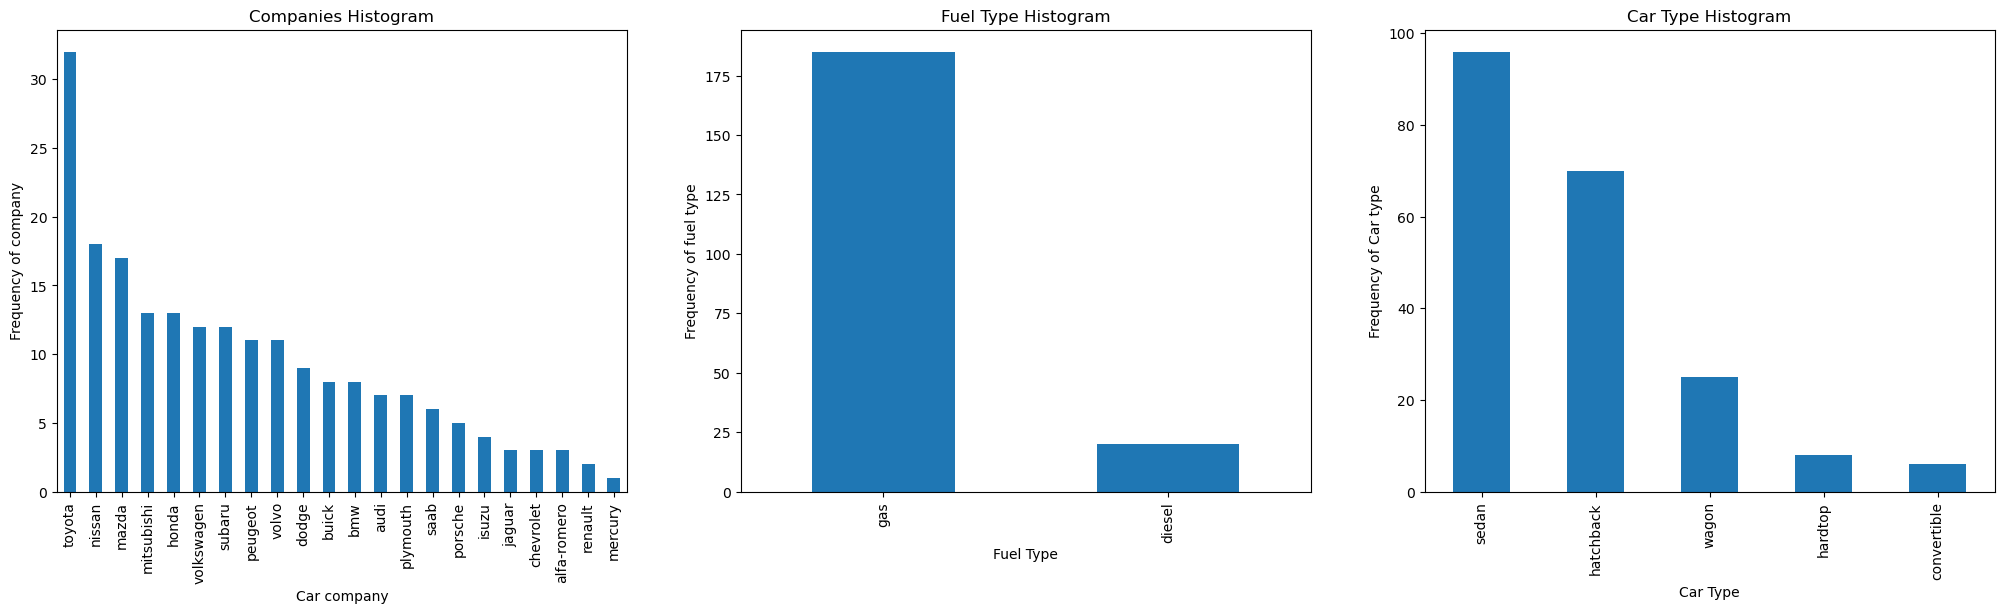

In [7]:
sns.distplot(tester.price)

plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = file.CompanyName.value_counts().plot(kind ='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = file.fueltype.value_counts().plot(kind ='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = file.carbody.value_counts().plot(kind ='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


In [8]:
#sorting Companies based on avg prices
file['price'] = file['price'].astype('int')
temp = file.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,15000,30000,50000]
cars_bin=['lowend','midend','highend']
file['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
file.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,midend
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,midend
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,midend
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,midend
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,midend


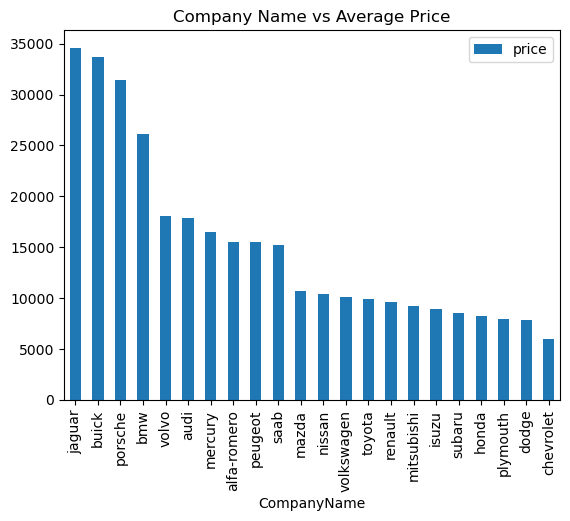

In [9]:
df = pd.DataFrame(file.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

In [10]:
file = file.drop(["CompanyName"], axis=1)
file.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,midend
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,midend
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,midend
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,midend
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,midend


In [11]:
# change the position of column 'price' to be the first column
file = file.reindex(columns=['price', 'car_ID', 'symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','carsrange'])
file.head()

,price,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carsrange
0,13495,1,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,midend
1,16500,2,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,midend
2,16500,3,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,midend
3,13950,4,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,midend
4,17450,5,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,midend


In [12]:
#split into numerical and categorical values

numeric_data = file.select_dtypes(include=[np.number])
categorical_data = file.select_dtypes(exclude=[np.number])

numeric_data.head()


,price,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,16500,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,16500,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,13950,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,17450,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [13]:
categorical_data.head()               


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carsrange
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,midend
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,midend
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,midend
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,midend
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,midend


In [14]:
x= categorical_data
print(x)

    fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

    enginetype cylindernumber fuelsystem carsrange  
0         dohc        

In [15]:
file.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [16]:
print(file['fueltype'].isna().sum())

0


In [17]:
def dummies(x,file):
    temp = pd.get_dummies(file[x], drop_first = True)
    file = pd.concat([file, temp], axis = 1)
    file.drop([x], axis = 1, inplace = True)
    return file

file = dummies('fueltype',file)
file = dummies('aspiration',file)
file = dummies('doornumber',file)
file = dummies('carbody',file)
file = dummies('drivewheel',file)
file = dummies('enginelocation',file)
file = dummies('enginetype',file)
file = dummies('cylindernumber',file)
file = dummies('fuelsystem',file)
file = dummies('carsrange',file)

In [18]:
file.head()

,price,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,midend,highend
0,13495,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,1,0,0,1,0
1,16500,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,1,0,0,1,0
2,16500,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,1,0,0,1,0
3,13950,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,1,0,0,1,0
4,17450,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,1,0,0,1,0


In [19]:
#find correlation
file.corr()


,price,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,midend,highend
price,1.000000,-0.109093,-0.079978,0.577816,0.682921,0.759325,0.119337,0.835305,0.874145,0.553174,...,-0.004544,-0.501375,-0.017306,0.105680,-0.002747,0.517075,-0.061475,-0.019580,0.339820,0.724603
car_ID,-0.109093,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,...,-0.108464,-0.085037,-0.094729,0.125568,-0.086367,0.186275,-0.037015,-0.066254,-0.066280,-0.088807
symboling,-0.079978,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,...,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707,-0.170057,-0.005070
wheelbase,0.577816,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,...,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129,0.487082,0.292718
carlength,0.682921,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,...,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245,0.536117,0.324346
carwidth,0.759325,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,...,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158,0.410678,0.504553
carheight,0.119337,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,...,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778,0.397662,-0.036541
curbweight,0.835305,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,...,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052,0.426241,0.532825
enginesize,0.874145,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,...,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327,0.173854,0.682673
boreratio,0.553174,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,...,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977,0.293843,0.367752


In [20]:
#we can see that a few variables have positive correlation to price
file.head()

,price,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,midend,highend
0,13495,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,1,0,0,1,0
1,16500,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,1,0,0,1,0
2,16500,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,1,0,0,1,0
3,13950,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,1,0,0,1,0
4,17450,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,1,0,0,1,0


In [21]:
#dropping all columns with negative relation and price
file = file.drop(["car_ID"], axis=1)
file = file.drop(["symboling"], axis=1)
file = file.drop(["peakrpm"], axis=1)
file = file.drop(["citympg"], axis=1)
file = file.drop(["highwaympg"], axis=1)
file = file.drop(["gas"], axis=1)
file = file.drop(["two"], axis=1)
file = file.drop(["hatchback"], axis=1)
file = file.drop(["wagon"], axis=1)
file = file.drop(["fwd"], axis=1)
file = file.drop(["ohc"], axis=1)
file = file.drop(["rotor"], axis=1)
file = file.drop(["four"], axis=1)
file = file.drop(["three"], axis=1)
file = file.drop(["2bbl"], axis=1)
file = file.drop(["4bbl"], axis=1)
file = file.drop(["mfi"], axis=1)
file = file.drop(["spdi"], axis=1)
file = file.drop(["spfi"], axis=1)
file.head()


,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,l,ohcf,ohcv,five,six,twelve,idi,mpfi,midend,highend
0,13495,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,1,0
1,16500,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,1,0
2,16500,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,1,0,0,1,1,0
3,13950,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,1,0
4,17450,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,1,0,0,0,1,1,0


In [22]:
file.shape

(205, 27)

In [23]:
#optimising the weights & producing predicted values
 
class LinearRegression:

    def __init__(self, lr=0.05, n=10):
        self.lr=lr
        self.n= n
        self.weights= None
        self.base= None

    def optimize(self, x, y):
        samples, features = x.shape
        self.weights = np.zeros(features)
        self.bias=0

        for i in range(self.n):   
            y_pred = np.dot(x, self.weights) + self.bias #Hypothesis function y = mx + c, where x is weights and c is bias
            dw = (1/samples) * np.dot(x.T, (y_pred - y))
            db = (1/samples) * np.sum(y_pred-y)
            #Trains the weights and biases to new values with each iteration
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db   
          

    def predict(self, x):
        y_pred = np.dot(x,self.weights) + self.bias
        return y_pred 
    

In [24]:
file.head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,l,ohcf,ohcv,five,six,twelve,idi,mpfi,midend,highend
0,13495,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,1,0
1,16500,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,1,0
2,16500,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,1,0,0,1,1,0
3,13950,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,1,0
4,17450,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,1,0,0,0,1,1,0


In [25]:
x= file.loc[:, file. columns != 'price']
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,l,ohcf,ohcv,five,six,twelve,idi,mpfi,midend,highend
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,1,0,0,1,1,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,1,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,1,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,1,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,1,0,1,0,0,1,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,1,0,1,0,1,0


In [26]:
y = file['price']
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [27]:
train_size = int(0.8 * len(file))
x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
train_size

164

In [28]:
print("x train is", x_train)
print("Y train is", y_train)
print("X test is", x_test)
print("Y test is", y_test)

x train is      wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
159       95.7      166.3      64.4       52.8        2275         110   
160       95.7      166.3      64.4       53.0        2094          98   
161       95.7      166.3      64.4       52.8        2122          98   
162       95.7      166.3      64.4       52.8        2140          98   
163       94.5      168.7      64.0       52.6        2169          98   

     boreratio  stroke  compressionratio  horsepower  ...  l  ohcf  ohcv  \
0         3.47    2.68  

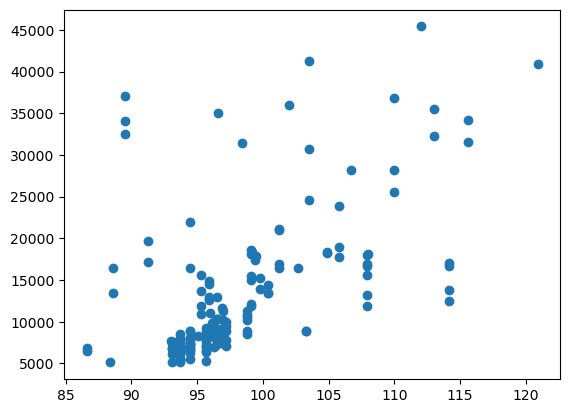

In [29]:
plt.scatter(x_train.iloc[:,0],y_train)


In [30]:
#feature scaling
x_train = (x_train - np.mean(x_train)) / (np.std(x_train))
x_test = (x_test - np.mean(x_test)) / ( np.std(x_test))

In [31]:
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)
print("X train is ", x_train)
print("X Test is ", x_test)


X train is       wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0    -1.540709  -0.314895 -0.741881  -1.854218    0.029198    0.081058   
1    -1.540709  -0.314895 -0.741881  -1.854218    0.029198    0.081058   
2    -0.592007  -0.128739 -0.127394  -0.440021    0.526866    0.570115   
3     0.260217   0.290112  0.179850   0.306362   -0.352649   -0.385770   
4     0.195898   0.290112  0.267634   0.306362    0.528676    0.214437   
..         ...        ...       ...        ...         ...         ...   
159  -0.399051  -0.508807 -0.610205  -0.282887   -0.464851   -0.363540   
160  -0.399051  -0.508807 -0.610205  -0.204321   -0.792407   -0.630298   
161  -0.399051  -0.508807 -0.610205  -0.282887   -0.741736   -0.630298   
162  -0.399051  -0.508807 -0.610205  -0.282887   -0.709161   -0.630298   
163  -0.592007  -0.322651 -0.785772  -0.361454   -0.656680   -0.630298   

     boreratio    stroke  compressionratio  horsepower  ...         l  \
0     0.569251 -1.651438  

In [32]:
y_train = (y_train - np.mean(y_train)) / (np.std(y_train))
y_test = (y_test - np.mean(y_test)) / ( np.std(y_test))
print("Y train is ", y_train)
print("Y Test is ", y_test)

Y train is  0      0.015804
1      0.363125
2      0.363125
3      0.068394
4      0.472927
         ...   
159   -0.643816
160   -0.649595
161   -0.577935
162   -0.473912
163   -0.612610
Name: price, Length: 164, dtype: float64
Y Test is  164   -1.110908
165   -0.861025
166   -0.804448
167   -1.061167
168   -0.780639
169   -0.698130
170   -0.412887
171   -0.330379
172    1.112340
173   -0.943534
174   -0.530992
175   -0.698366
176   -0.483844
177   -0.401336
178    0.850434
179    0.718421
180    0.645814
181    0.659958
182   -1.220055
183   -1.172907
184   -1.168192
185   -1.121045
186   -1.050323
187   -0.814585
188   -0.696716
189   -0.319535
190   -0.700252
191    0.081220
192    0.210876
193   -0.155696
194   -0.002467
195    0.109509
196    0.715356
197    0.840298
198    1.289379
199    1.414320
200    0.918091
201    1.436715
202    2.011917
203    2.244119
204    2.280658
Name: price, dtype: float64


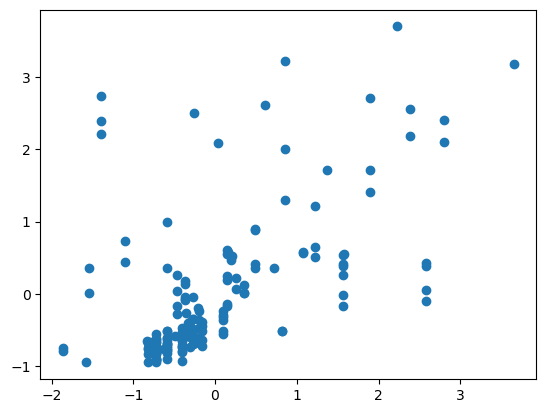

In [33]:
plt.scatter(x_train.iloc[:,0],y_train)

In [34]:
#calling the class
reg = LinearRegression()
reg.optimize(x_train,y_train)
predictions = reg.predict(x_test)
print(predictions)

[-1.11325255 -0.63476612 -0.66584979  0.31381939  0.31258543  0.0747699
  0.35669948  0.12505375  0.20337099 -0.36894944 -0.70857918 -0.38148452
 -0.34180233 -0.36791097  0.95340816  0.96574776  0.99661956  0.90207973
 -1.17858856 -0.73335142 -1.17766309 -0.73242596 -0.71299109 -1.09646089
 -0.64153384 -0.99145179 -0.94520075  0.1531541  -0.78960136 -0.39888193
  0.5909349   0.58383165  0.59803016  0.58629957  0.72865915  0.718471
  0.79440517  1.00812583  1.47801874  0.71175919  0.82490199]


<function matplotlib.pyplot.show(close=None, block=None)>

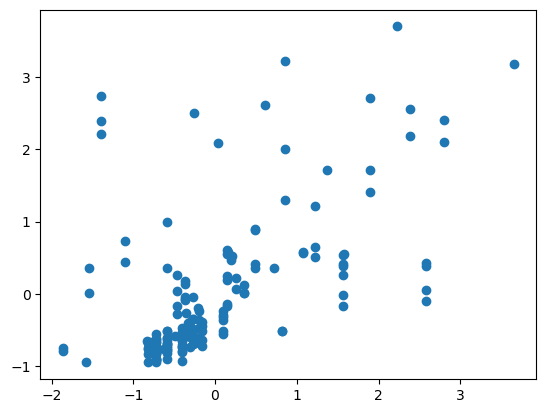

In [35]:
#visualisation
fig = plt.figure()
plt.scatter(x_train.iloc[:,0],y_train)
plt.show

In [36]:
#mean square error
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [37]:
MSE = mse(y_test, predictions)
print(MSE)

0.35709101897007317


In [38]:
RMSE = math.sqrt(MSE)
print(RMSE)

0.597570932166277
